<a href="https://colab.research.google.com/github/OmerElshrief/Offensive-Speech-Detection-text-Classification-/blob/master/OSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [0]:

from html.parser import HTMLParser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import csv
import re
import itertools
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, validation_curve
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, precision_recall_curve



## Phase 1 - Data PreProcessing and cleaning

#### Downloading NLTK Stopwords & treebank

In [19]:
nltk.download('stopwords')
nltk.download('treebank')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
wpt = nltk.WordPunctTokenizer()
stopWords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
part_of_speech_taggin = nltk.pos_tag
tagged_sentences = nltk.corpus.treebank.tagged_sents()

#### For the contraction Expanding

In [0]:
contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))


def expand_contractions(s, contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


#### Function for document Filter

In [0]:
def document_filter_tagging(doc):
    ## Remove HTML Characters
    html_parser = HTMLParser()
    doc = html_parser.unescape(doc)
    ## Decode the Data (keep all the data in UTF-8 encoded characters
    #doc = doc.encode.("utf8").encode('ascii','ignore')
    ## Remove Emoji if exist using Regular Expressions
    emoji_pattern = re.compile(
        u"(\ud83d[\ude00-\ude4f])|"  # emoticons
        u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
        u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
        u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
        u"(\ud83c[\udde0-\uddff])"   # flags (iOS)
        "+", flags=re.UNICODE)
    emoji_pattern.sub(r'', doc)
    
    ## Split attached words like "Fu*kYou"
    #doc = ' '.join(re.findall('[A-Z][^A-Z]+', doc))
    ## Standardizing Words "like FUUUUUUUU*K => FU*K"
    doc = ''.join(''.join(s)[:2] for _, s in itertools.groupby(doc))
    ## Lower canse
    doc = doc.lower()
    ## Expand contraction "isn't => is not"
    doc = expand_contractions(doc)
    ## Transform Slang Words NOT YET :( :(
    ## remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.strip()  # NO leading or tailing white spaces
    
    # tokenize document
    tokens = wpt.tokenize(doc)
   
  # Tagging each Token with POS
    text = tokens
    text_tagged = nltk.pos_tag(text)
    new_text = []
    for word in text_tagged:
        new_text.append(word[0] + "/" + word[1])
    ## filter stopwords out of document
    filtered_tokens=[]
    for token in new_text:
        if token.split('/')[0] not in stopWords:
            filtered_tokens.append(token)

    doc = ' '.join(filtered_tokens)
    
   
    # Remove punctuactions
    # This will remove every punctuation in the Document
    doc.translate(string.punctuation)
    return doc

In [0]:
def document_filter(doc):
    ## Remove HTML Characters
    html_parser = HTMLParser()
    doc = html_parser.unescape(doc)
    ## Decode the Data (keep all the data in UTF-8 encoded characters
    #doc = doc.encode.("utf8").encode('ascii','ignore')
    ## Remove Emoji if exist using Regular Expressions
    emoji_pattern = re.compile(
        u"(\ud83d[\ude00-\ude4f])|"  # emoticons
        u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
        u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
        u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
        u"(\ud83c[\udde0-\uddff])"   # flags (iOS)
        "+", flags=re.UNICODE)
    emoji_pattern.sub(r'', doc)
    
    ## Split attached words like "Fu*kYou"
    #doc = ' '.join(re.findall('[A-Z][^A-Z]+', doc))
    ## Standardizing Words "like FUUUUUUUU*K => FU*K"
    doc = ''.join(''.join(s)[:2] for _, s in itertools.groupby(doc))
    ## Lower canse
    doc = doc.lower()
    ## Expand contraction "isn't => is not"
    doc = expand_contractions(doc)
    ## Transform Slang Words NOT YET :( :(
    ## remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.strip()  # NO leading or tailing white spaces
    
    # tokenize document
    tokens = wpt.tokenize(doc)
   
   ## filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopWords]
  
    # Stemming the Document using NLTK
    stemmed_tokens = []
    for token in filtered_tokens:
        stemmed_tokens.append(stemmer.stem(token))
    doc = ' '.join(stemmed_tokens)
    # Lemmatization with NLTK
    lemmatized_tokens = []
    for token in stemmed_tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token))
    doc = ' '.join(filtered_tokens)
    
   
    # Remove punctuactions
    # This will remove every punctuation in the Document
    doc.translate(string.punctuation)
    return doc

### Improting the DataSet

In [17]:
location = 'DataSet.csv'

#header = 0 => let the Columns names be the first line of the DATASET
data = pd.read_csv(location, header=0,sep = ' ')

print("Loaded")
filterd_tweets = data['tweet']
labels = data['label']


Loaded


#### Data Preprocessing and Cleaning

In [20]:
filter_data = np.vectorize(document_filter)
filterd_tweets = filter_data(filterd_tweets)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


#### For the Tagged vectors

In [0]:
filter_data = np.vectorize(document_filter_tagged)
filterd_tweets = filter_data(filterd_tweets)

In [0]:
## Converting data_Y to binary
data_y = []
for label in labels:
    if label =='OFF':
        data_y.append(1)
    else:
        data_y.append(0)

### Writing the Data into a CSV File 

In [0]:
data_frame = pd.DataFrame({'tweet': filterd_tweets, 'label': labels})
print(data_frame)
data_frame.to_csv('NormalizedData.csv',sep = ' ')
print("Done")

## Phas2 : Vectorization

#### Function for generating feature vectors 

In [0]:
def cv_Vectorization(data, range=(1, 2)):

    WoB_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=range, max_features=10000)
    cv = WoB_vect.fit_transform(data.values.astype('U')).toarray()


    return cv, cv_valid

# TF_IDF vectorizer based on 2-grams words


def tfdif_vectorization(data_train, range=(2, 3)):

    
    tfdif_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=range, max_features=10000, min_df=0, max_df=1)
    tfdif_train_x = tfdif_vectorizer.fit_transform(data_train.values.astype('U'))
    
    

    return tfdif_train_x


def bow_tfidf_vectorization(data_train, range=(2, 3)):
    WoB_vect = CountVectorizer(
        analyzer='word', token_pattern=r'\w{1,}', ngram_range=range, max_features=5000)
    cv = WoB_vect.fit_transform(data_train.values.astype('U'))
    #cv_valid = WoB_vect.fit_transform(data_validation.values.astype('U'))

    tfdif_transformer = TfidfTransformer()
    tfdif_train_x = tfdif_transformer.fit_transform(cv)
    #tfdif_validation_x = tfdif_transformer.fit_transform(cv_valid)

    return tfdif_train_x




#### Function for Model Training

In [0]:
## Model Training...
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return np.mean(predictions == valid_y)

#### Normalized Data loading

In [0]:
location = r'NormalizedData.csv'
##pd.read_table:
#header = 0 => let the Columns names be the first line of the DATASET
data = pd.read_csv(location, header=0, sep=' ', error_bad_lines=False)
filterd_tweets = data['tweet']
labels = data['label']

#### Splitting the data into testing and validation

In [0]:

## Split data into Training_data 90% and Validation data 10%
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(filterd_tweets, labels, test_size=0.1, random_state=42)


#### Building feature vectors 

In [34]:
train_x_tfdif_1grams = tfdif_vectorization(filterd_tweets, range=(1, 3))
train_x_tfdif_1grams = bow_tfidf_vectorization(filterd_tweets,(1,1))
talid_x_tfdif_1grams = bow_tfidf_vectorization(filterd_tweets, (1, 1))
train_x_tfdif_2grams = tfdif_vectorization(filterd_tweets, range=(1, 2))
train_x_tfdif_3grams = tfdif_vectorization(filterd_tweets, range=(2, 3))
train_x_cv_1grams    = cv_Vectorization(filterd_tweets, range=(1, 2))
train_x_cv_2grams    = cv_Vectorization(filterd_tweets, range=(2, 3))
train_x_cv_3grams    = cv_Vectorization(filterd_tweets, range=(1, 3))

NameError: ignored

#### Building classfiers 

In [0]:
## Classifiers
clf_lr = linear_model.LogisticRegression(penalty='l1', C=0.3, max_iter=15000, solver='liblinear')
clf_nb = naive_bayes.MultinomialNB(alpha = 0.001,fit_prior=False)
clf_sgdc = linear_model.SGDClassifier(penalty='l1',  random_state=42, loss='log', l1_ratio=0.1,alpha=0.0001, learning_rate='adaptive', tol=None, max_iter=3000, n_jobs=-1, eta0=0.001)
clf_svc = svm.LinearSVC(penalty='l1', C=0.2, max_iter=10000, random_state=45, loss='squared_hinge', dual=False)
clf_rf = RandomForestClassifier(n_estimators=20, max_features=8000,random_state =46 )
clf_knn = KNeighborsClassifier(n_neighbors=7)
eclf1 = EnsembleVoteClassifier(clfs=[clf_lr, clf_sgdc, clf_svc], voting='hard', verbose=1)

### Grid search scripts for hyperParameters tuning 

##### for random forest

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### STGD and Linear SVC

In [0]:
## STOCHASTIC GRADIENT DESCENT TUNING
alpha = [1,0.1,0.001,0.0001]
l1_ratio = [0.1,0.3,0.5]
# Grid search is done and Best  Best parameters for  are :  {'(penalty='l1',  random_state=42,loss ='log',l1_ratio=0.1,alpha=0.0001}


## SVC Parameters Tuning
Cs = [0.1,0.2,0.3,0.1,0.5]

param_grid = {'clf__C': Cs}
# Grid search is done and Best  Best parameters for  are :  {'clf__C': 10}

In [0]:
model_lr = RandomizedSearchCV(estimator=pip, param_distributions=param_grid, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)
model_lr.fit(train_x.astype('U'), train_y)


#### K-NN

In [0]:
## Getting the Best K for KNN classifier
score = {}
score_list = []
ranke_k = (1, 25)
for i in ranke_k:
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    pip = Pipeline([('vec', CountVectorizer(max_features=15000, max_df=0.4)), ('clf',  clf_knn)])
    pip.fit(train_x.astype('U'), train_y)
    prediction = pip.predict(valid_x.astype('U'))
    score[i]=accuracy_score(valid_y,prediction)
    score_list.append(accuracy_score(valid_y, prediction))
    print('K== %d  accuracy = %0.2f' %(i,score[i]))

plt.plot(ranke_k,score_list)
plt.xlabel('Value of K')
plt.ylabel('Value for Test accuracy')
plt.show()


## Training our models 



#### Building the pipeline

In [0]:
pip = Pipeline([('vec', CountVectorizer(max_features=8000,  max_df=0.4, analyzer='word')), ('clf',  clf_lr)])


#### training and fitting

training:  0.3219754529514904
              precision    recall  f1-score   support

           0       0.32      1.00      0.49     11018
           1       0.00      0.00      0.00     23202

   micro avg       0.32      0.32      0.32     34220
   macro avg       0.16      0.50      0.24     34220
weighted avg       0.10      0.32      0.16     34220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


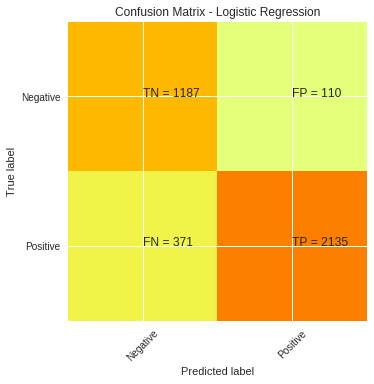

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1297
           1       0.95      0.85      0.90      2506

   micro avg       0.87      0.87      0.87      3803
   macro avg       0.86      0.88      0.87      3803
weighted avg       0.89      0.87      0.88      3803

<function confusion_matrix at 0x7f674369a268>
0.8735209045490402


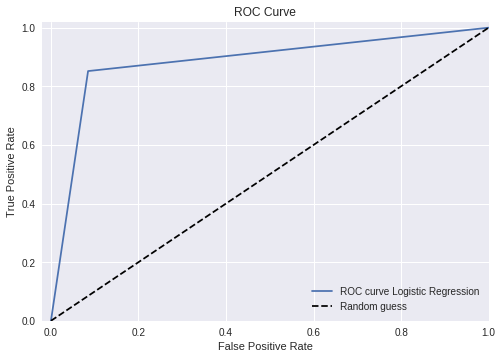

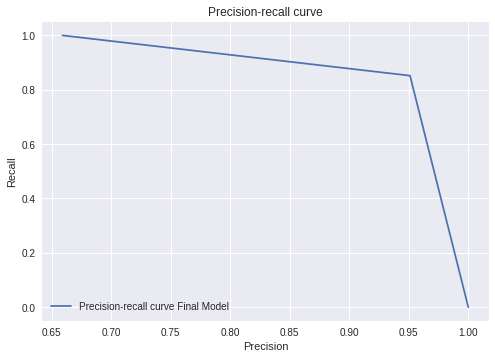

In [32]:
pip.fit(train_x.astype('U'), train_y)
training_pridiction = pip.predict(train_y.astype('U'))
training_Accurecy = accuracy_score(train_y,training_pridiction)
print('training: ',training_Accurecy)
print(classification_report(train_y, training_pridiction))
prediction = pip.predict(valid_x.astype('U'))
accuracy = np.mean(prediction==valid_y)
report = classification_report(valid_y , prediction)
cm = confusion_matrix(valid_y, prediction)

## Plotting the Confusion Matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

print(report)
print(confusion_matrix)
print(accuracy_score(valid_y,prediction))
fpr, tpr, thresholds = roc_curve(np.array(valid_y),np.array(prediction))

# create plot for ROC Curve
plt.plot(fpr, tpr, label='ROC curve Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(valid_y, prediction)
# create plot
plt.plot(precision, recall, label='Precision-recall curve Final Model')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()



#### Training and fitting the Model using pre-built feature vectors (Bad Results)

In [33]:
accuracy = train_model(eclf1, train_x_tfdif_2grams, train_y, valid_x_tfdif_2grams, valid_y)
print("ECLF : ",accuracy)

# Train the Model and validate (return accurecy of the Model)

score = cross_val_score(clf_lr, train_x_tfdif_2grams, train_y, cv=5,scoring="roc_auc")
print('HEeeey LR: Score: ', score.mean())
accuracy = train_model(clf_nb, train_x_tfdif_1grams,train_y, valid_x_tfdif_1grams, valid_y)
print('Naive Bayes : ' ,accuracy)


accuracy = train_model(clf_lr, train_x_tfdif_1grams,train_y, valid_x_tfdif_1grams, valid_y)
print('Logistic Regression: ',accuracy)

accuracy = train_model(clf_rf, train_x_tfdif_2grams,
                       train_y, valid_x_tfdif_2grams, valid_y)
print('Random Forests: ', accuracy)

accuracy = train_model(clf_sgdc, train_x_tfdif_2grams, train_y, valid_x_tfdif_2grams, valid_y)
print('SGDC(2): ', accuracy)


accuracy = train_model(clf_svc, train_x_tfdif_2grams, train_y, valid_x_tfdif_2grams, valid_y)
print('SVC: ', accuracy)


NameError: ignored